In [2]:
import pandas as pd

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
pd.set_option('display.max_columns', 100)

# data collection

In [4]:
import json
import requests
import time
import csv
from datetime import datetime
import urllib.parse

In [18]:
print(data['reviews'][0]['author'].keys())
print(data['reviews'][0].keys())

dict_keys(['steamid', 'num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played'])
dict_keys(['recommendationid', 'author', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'hidden_in_steam_china', 'steam_china_location'])


In [38]:
# columns that will be kept (probably all of them for now)
collectedData = pd.DataFrame(columns=['recommendation_id', 'review', 'timestamp_created', 
                                      'timestamp_updated', 'voted_up', 'votes_up', 
                                      'votes_funny', 'weighted_vote_score', 'comment_count', 
                                      'steam_purchase', 'received_for_free', 'written_during_early_access', 
                                      'hidden_in_steam_china', 'steam_china_location', 'author_steamid', 
                                      'author_num_games_owned', 'author_num_reviews', 'author_playtime_forever', 
                                      'author_playtime_last_two_weeks', 'author_playtime_at_review', 'author_last_played', 
                                      'language'])


In [39]:
next_cursor = ""
prev_cursor = "asd"
response = requests.get("https://store.steampowered.com/appreviews/1658280?filter=recent&language=all&purchase_type=all&num_per_page=100&filter_offtopic_activity=0&json=1").json()

# temporarily 
while response['success'] == 1:
    # break the loop if the cursor is the same as the previous cursor
    if next_cursor == prev_cursor:
        break

    # temporarily store the data of the current review in a dictionary
    review_list = []
    for review in response['reviews']:
        review_dict = {}
        review_dict['recommendation_id'] = review['recommendationid']
        review_dict['language'] = review['language']
        review_dict['review'] = review['review']
        review_dict['timestamp_created'] = review['timestamp_created']
        review_dict['timestamp_updated'] = review['timestamp_updated']
        review_dict['voted_up'] = review['voted_up']
        review_dict['votes_up'] = review['votes_up']
        review_dict['votes_funny'] = review['votes_funny']
        review_dict['weighted_vote_score'] = review['weighted_vote_score']
        review_dict['comment_count'] = review['comment_count']
        review_dict['steam_purchase'] = review['steam_purchase']
        review_dict['received_for_free'] = review['received_for_free']
        review_dict['written_during_early_access'] = review['written_during_early_access']
        review_dict['hidden_in_steam_china'] = review['hidden_in_steam_china']
        review_dict['steam_china_location'] = review['steam_china_location']
        review_dict['author_steamid'] = review['author']['steamid']
        review_dict['author_num_games_owned'] = review['author']['num_games_owned']
        review_dict['author_num_reviews'] = review['author']['num_reviews']
        review_dict['author_playtime_forever'] = review['author']['playtime_forever']
        review_dict['author_playtime_last_two_weeks'] = review['author']['playtime_last_two_weeks']
        review_dict['author_playtime_at_review'] = review['author']['playtime_at_review']
        review_dict['author_last_played'] = review['author']['last_played']
        review_list.append(review_dict)

    # insert the data of the current review into the dataframe
    collectedData = pd.concat([collectedData, pd.DataFrame(review_list)], ignore_index=True)
    print("Number of reviews collected: " + str(len(collectedData)))
    
    prev_cursor = next_cursor
    next_cursor = response['cursor']
    print("next cursor: " + next_cursor + " prev cursor: " + prev_cursor)

    # update the next cursor and the previous cursor
    
    # add delay to avoid being blocked by the API
    time.sleep(1)

    # get the next page of reviews
    response = requests.get("https://store.steampowered.com/appreviews/1658280?filter=recent&language=all&purchase_type=all&num_per_page=100&filter_offtopic_activity=0&json=1&cursor=" + urllib.parse.quote(next_cursor)).json()

# save the collected data to a csv file
collectedData.to_csv("data/reviews.csv", index=False)
print("data is saved, with total of " + str(len(collectedData)) + " reviews.")

Number of reviews collected: 100
next cursor: AoJ4sqq4rI8DceCR9QQ= prev cursor: 
Number of reviews collected: 200
next cursor: AoJ4gpSqp48Dddev9AQ= prev cursor: AoJ4sqq4rI8DceCR9QQ=
Number of reviews collected: 300
next cursor: AoJ4+tS9o48DdKGc8wQ= prev cursor: AoJ4gpSqp48Dddev9AQ=
Number of reviews collected: 400
next cursor: AoJ4lN7Rn48DePaY8gQ= prev cursor: AoJ4+tS9o48DdKGc8wQ=
Number of reviews collected: 500
next cursor: AoJw6+XVnI8Devfo8QQ= prev cursor: AoJ4lN7Rn48DePaY8gQ=
Number of reviews collected: 600
next cursor: AoJ45NXumI8DfJm38QQ= prev cursor: AoJw6+XVnI8Devfo8QQ=
Number of reviews collected: 700
next cursor: AoJ4jbuzlo8DcZmU8QQ= prev cursor: AoJ45NXumI8DfJm38QQ=
Number of reviews collected: 800
next cursor: AoJwu5e8k48DffDw8AQ= prev cursor: AoJ4jbuzlo8DcZmU8QQ=
Number of reviews collected: 900
next cursor: AoJwusPrkY8Dc43X8AQ= prev cursor: AoJwu5e8k48DffDw8AQ=
Number of reviews collected: 1000
next cursor: AoJwpK+IkI8DfYy+8AQ= prev cursor: AoJwusPrkY8Dc43X8AQ=
Number of

In [44]:
collectedData.head(10)

,recommendation_id,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,language
0,165125622,Nel suo complesso è un buon gioco. \r\nStoria:...,1715418818,1715418818,True,0,0,0,0,False,False,False,True,,76561198068781442,0,2,4490,3119,4490,1715107978,italian
1,165125354,Отличный наследник Suikoden.,1715418496,1715418496,True,0,0,0,0,True,False,False,True,,76561197993308792,0,10,3919,3919,3919,1715418273,russian
2,165122621,Need a Sequel ASAP,1715414879,1715414879,True,0,0,0,0,True,False,False,True,,76561198078350168,0,6,4197,4191,4107,1715420337,english
3,165121992,good game,1715414074,1715414074,True,0,0,0,0,False,False,False,True,,76561198336064363,0,2,2339,2286,2218,1715421320,english
4,165120996,6.5/10 at best\r\n\r\nThe bad :\r\n- The story...,1715412639,1715412639,False,0,0,0,0,True,False,False,True,,76561198337722758,0,12,4887,2552,4887,1715390461,english
5,165120820,\n게임 재밌음. 이리저리 조합하고 짜는 재미도 있고\n음악도 괜찮고 즐길꺼리도 꽤...,1715412367,1715412367,True,0,0,0,0,True,False,False,True,,76561198990806730,0,2,3039,3039,2962,1715419973,koreana
6,165120515,"[h1] ""O fantastic captain… I sent you to solve...",1715411877,1715415548,True,13,0,0.688147544860839844,5,True,False,False,True,,76561197968514473,356,98,4158,4009,4158,1715412966,english
7,165118391,[table]\n [tr]\n [th]Game Genre[/th]...,1715408732,1715408732,True,1,0,0.523809552192687988,0,True,False,False,True,,76561199229421781,0,138,6169,3244,6145,1715409337,english
8,165115083,69 hours played! Nice! also Great game!,1715404069,1715404069,True,0,1,0,0,True,False,False,True,,76561198089180116,0,8,4168,3848,4168,1715391268,english
9,165114118,It's a wonderful successor to Suikoden! Love it!,1715402773,1715402773,True,0,0,0,0,False,False,False,True,,76561198093347974,0,1,2384,1633,2384,1715402713,english


# data loading

In [138]:
columns_dtype = {
    'recommendation_id': 'str',
    'review': 'str',
    'voted_up': 'bool',
    'votes_up': 'int64',
    'votes_funny': 'int64',
    'weighted_vote_score': 'float64',
    'comment_count': 'int64',
    'steam_purchase': 'bool',
    'received_for_free': 'bool',
    'written_during_early_access': 'bool',
    'hidden_in_steam_china': 'bool',
    'steam_china_location': 'str',
    'author_steamid': 'int64',
    'author_num_games_owned': 'int64',
    'author_num_reviews': 'int64',
    'author_playtime_forever': 'int64',
    'author_playtime_last_two_weeks': 'int64',
    'author_playtime_at_review': 'int64',
    'language': 'str',
    'timestamp_created': 'int',
    'timestamp_updated': 'int',
    'author_last_played': 'int'
}

In [139]:
# load the data with the correct data type
collectedData = pd.read_csv("data/reviews.csv", dtype=columns_dtype)
collectedData['timestamp_created'] = pd.to_datetime(collectedData['timestamp_created'], unit='s')
collectedData['timestamp_updated'] = pd.to_datetime(collectedData['timestamp_updated'], unit='s')
collectedData['author_last_played'] = pd.to_datetime(collectedData['author_last_played'], unit='s')

In [141]:
collectedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   recommendation_id               2147 non-null   object        
 1   review                          2144 non-null   object        
 2   timestamp_created               2147 non-null   datetime64[ns]
 3   timestamp_updated               2147 non-null   datetime64[ns]
 4   voted_up                        2147 non-null   bool          
 5   votes_up                        2147 non-null   int64         
 6   votes_funny                     2147 non-null   int64         
 7   weighted_vote_score             2147 non-null   float64       
 8   comment_count                   2147 non-null   int64         
 9   steam_purchase                  2147 non-null   bool          
 10  received_for_free               2147 non-null   bool          
 11  writ

# quick peek

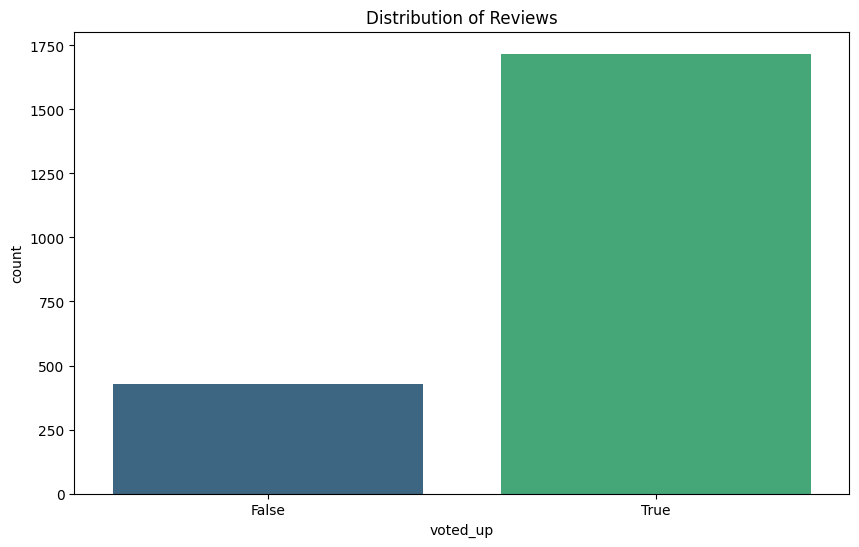

In [142]:
# visualize the distribution of the reviews
plt.figure(figsize=(10, 6))
sns.countplot(data = collectedData, x = 'voted_up', palette = 'viridis', hue = 'voted_up', legend = False)
plt.title("Distribution of Reviews")
plt.show()


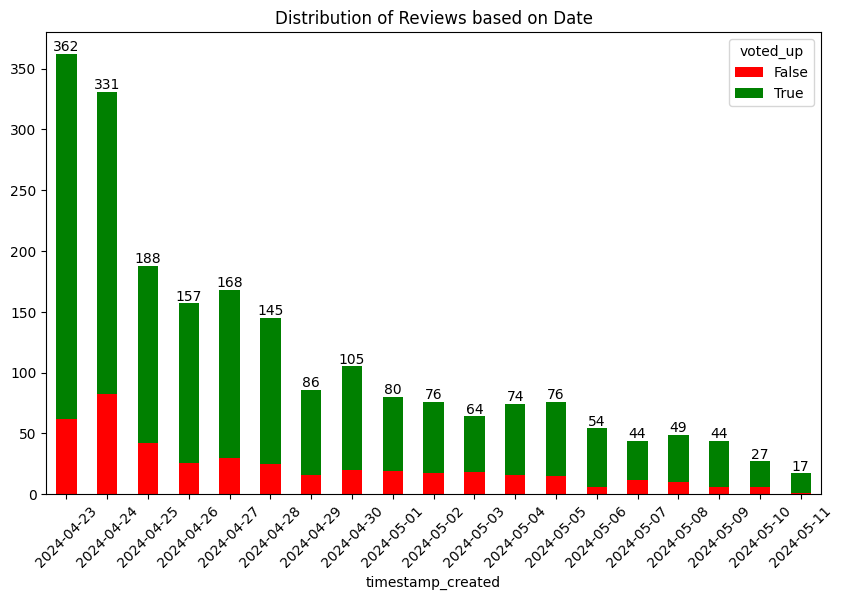

In [151]:
# visualize the distribution of reviews
plt.figure(figsize=(10, 6))

# group the data by date and voted_up
grouped_data = collectedData.groupby([collectedData['timestamp_created'].dt.date, 'voted_up']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())

for i in range(len(grouped_data)):
    plt.text(i, grouped_data.iloc[i].sum(), grouped_data.iloc[i].sum(), ha='center', va='bottom')
plt.title("Distribution of Reviews based on Date")

plt.xticks(rotation=45)
plt.show()


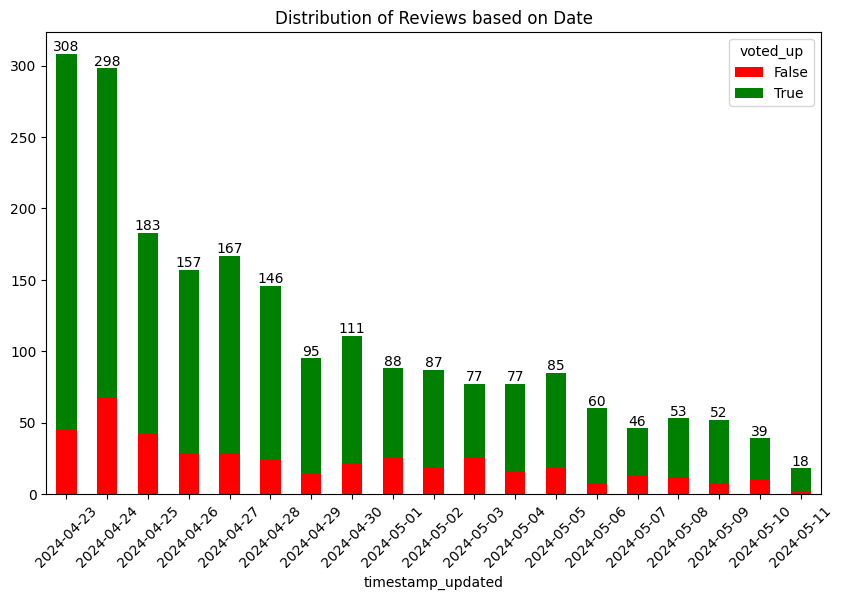

In [154]:
# visualize the distribution of reviews
plt.figure(figsize=(10, 6))

# group the data by date and voted_up
grouped_data = collectedData.groupby([collectedData['timestamp_updated'].dt.date, 'voted_up']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title("Distribution of Reviews based on Date")

for i in range(len(grouped_data)):
    plt.text(i, grouped_data.iloc[i].sum(), grouped_data.iloc[i].sum(), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


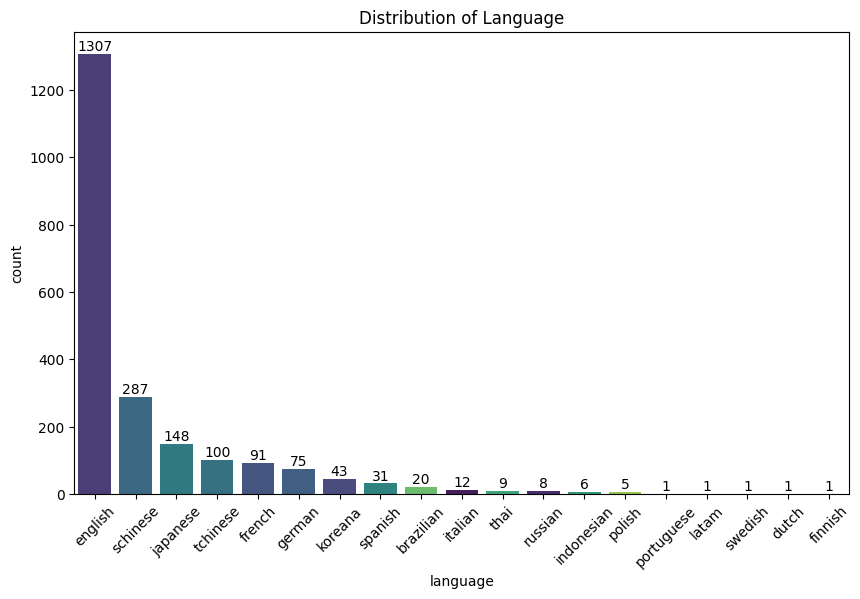

In [143]:
# distribution of the language column
plt.figure(figsize=(10, 6))
sns.countplot(data=collectedData, x='language', palette = 'viridis', hue = 'language', legend = False, order=collectedData['language'].value_counts().index)

plt.title('Distribution of Language')
plt.xticks(rotation=45)

for i in range(len(collectedData['language'].value_counts())):
    count = collectedData['language'].value_counts().values[i]
    plt.text(i, count + 10, count, ha='center')
plt.show()